In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("C:/Users/Usuario/Estadistica/Estadistica-Inferencia/res/blocks.csv")
data.head()

,Unnamed: 0,Child,Number,Time,Trial,Shape,Age
0,0,A,11,30.0,1,Cube,4.67
1,1,B,9,19.0,1,Cube,5.00
2,2,C,8,18.6,1,Cube,4.42
3,3,D,9,23.0,1,Cube,4.33
4,4,E,10,29.0,1,Cube,4.33


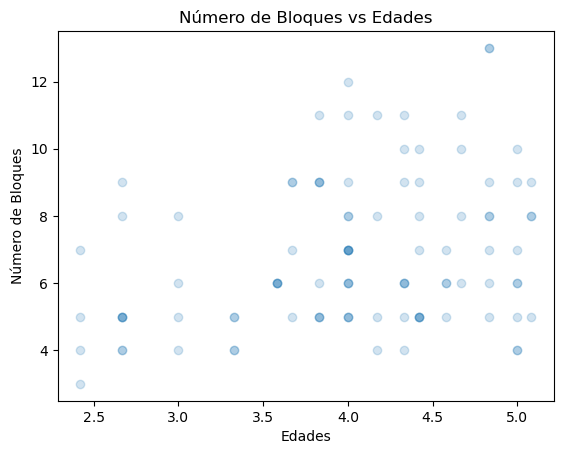

In [8]:
plt.scatter(data["Age"], data["Number"], alpha=0.2)
plt.xlabel('Edades')
plt.ylabel('Número de Bloques')
plt.title('Número de Bloques vs Edades')
plt.show()

decimos que $Y$ es una variable aleatoria con distribucion de poisson con $mu$ como valor, el componente sistematico (link) es $b0+b1*x$, y usamos $log(mu)$ como link, porque es el canonico y garantiza que la imagen sea compatible con poisson

A)

$Y$ relaciona con Poison(Mu) 

log(mu) = regresion lineal

$mu$ depende de b0 y b1

B) tengo que usar verosimilitud para ajustar el problema: quiero obtener los betas que maximizen la likelihood, y reemplazo $mu$ por b0+b1*x

likelihood: productoria de funcion de distribucion de cada punto

log_likelihood: sumatoria del logaritmo de la funcion de la distribucion

In [11]:
from scipy.optimize import minimize 

def neg_log_likelihood_poisson(beta, X,Y): 
    lambda_ = np.exp(np.dot(X,beta))
    return -np.sum(Y * np.log(lambda_) - lambda_)

initial_beta = [0,0]
X_int = np.column_stack([np.ones_like(data["Age"]), data["Age"]])
Y_poisson = data["Number"]
res_poisson = minimize(neg_log_likelihood_poisson,initial_beta, args= (X_int, Y_inv_gaussian))
beta_0, beta_1 = res_poisson.x

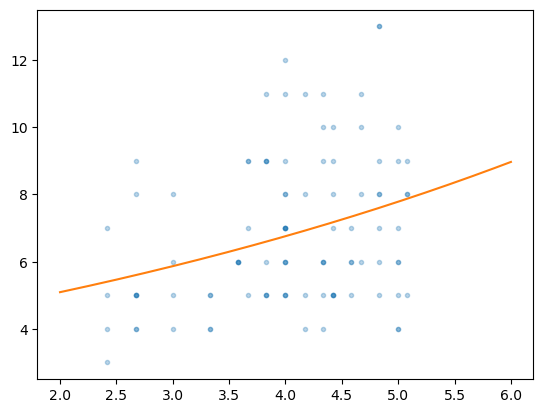

In [13]:
fig, ax = plt.subplots()
x = data["Age"]
ax.plot(x,data["Number"],".", alpha=0.3)
X_estimacion = np.linspace(2,6,1000)
mu_estaimacion= np.exp(beta_0 + beta_1 * X_estimacion)
ax.plot(X_estimacion, mu_estaimacion)

In [17]:
from numpy.linalg import inv
mu = np.exp(X_int @ res_poisson.x)
W = np.diag(mu)

Fisher_info_matrix = X_int.T @ W @ X_int
cov_matrix = inv(Fisher_info_matrix)

sem = np.sqrt(cov_matrix[1][1])

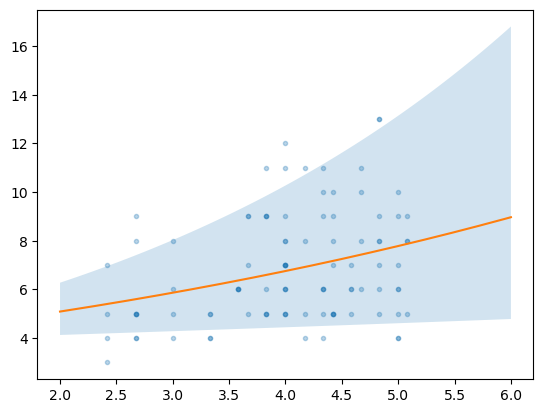

In [18]:
fig, ax = plt.subplots()
x = data["Age"]
ax.plot(x,data["Number"],".", alpha=0.3)
X_estimacion = np.linspace(2,6,1000)
mu_estaimacion= np.exp(beta_0 + beta_1 * X_estimacion)
mu_alto = np.exp(beta_0 + (beta_1 + sem *1.96) * X_estimacion)
mu_bajo = np.exp(beta_0 + (beta_1 - sem *1.96) * X_estimacion)
ax.plot(X_estimacion, mu_estaimacion)
ax.fill_between(X_estimacion, mu_bajo, mu_alto, alpha=0.2)

In [ ]:
import math 
def ne_gamma_log_likelihood(params, X,Y):
    betas = params[:-1]
    alpha = params[-1]
    mu = np.exp(np.dot(betas, X.T))
    betas_log = (-Y / mu - np.log(mu) * alpha)
    alpha_log = (alpha - 1) * np.log(Y) + alpha * np.log(math.gamma(alpha))
    return - np.sum(betas_log + alpha_log)

Nambe Mills en una fábrica de vajilla. Figuran, entre otros datos, el diámetro y el precio de la vajilla producida durante un período de tiempo fijo.

(b) Ajustar este MLG, es decir, encontrar estimaciones puntuales para los parámetros de regresión 𝛽.

(c) Determinar el error estándar de cada parámetro de regresión.

(d) Obtener la devianza residual.

(e) Obtener el estimador de devianza media de 𝜙 y el estimador de Pearson de �

In [20]:
data = pd.read_csv("C:/Users/Usuario/Estadistica/Estadistica-Inferencia/res/nambeware.csv")
data.head()

,Unnamed: 0,Type,Diam,Time,Price
0,0,CassDish,10.7,47.65,144.0
1,1,CassDish,14.0,63.13,215.0
2,2,CassDish,9.0,58.76,105.0
3,3,Bowl,8.0,34.88,69.0
4,4,Dish,10.0,55.53,134.0


(a) Graficar el precio 𝑦 vs el diámetro 𝑥. A partir del gráfico, proponer un MLG.

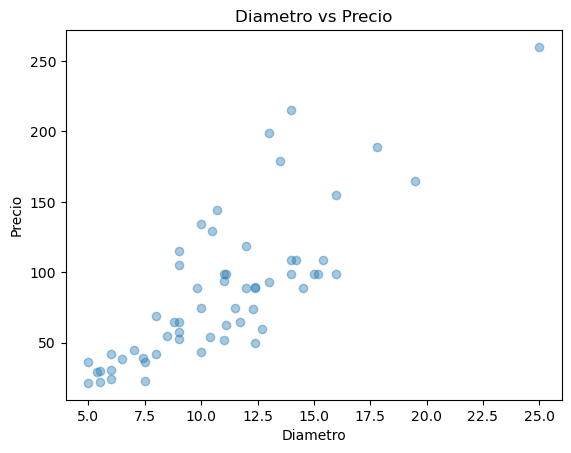

In [23]:
plt.scatter(data["Diam"], data["Price"], alpha=0.4)
plt.xlabel('Diametro')
plt.ylabel('Precio')
plt.title('Diametro vs Precio')
plt.show()

In [56]:
def ne_gamma_log_likelihood(params, X,Y):
    betas = params[:-1]
    alpha = params[-1]
    mu = np.exp(np.dot(betas, X.T))
    betas_log = (-Y / mu - np.log(mu) * alpha)
    alpha_log = (alpha - 1) * np.log(Y) + alpha * np.log(math.gamma(alpha))
    return - np.sum(betas_log + alpha_log)

initial_beta = [0,0]
X_int = np.column_stack([np.ones_like(data["Diam"]), data["Diam"]])
Y_poisson = data["Price"]
res_poisson = minimize(ne_gamma_log_likelihood,initial_beta, args= (X_int, Y_poisson))
beta_0, beta_1 = res_poisson.x

fig, ax = plt.subplots()
x = data["Diam"]
ax.plot(x,data["Price"],".", alpha=0.3)
X_estimacion = np.linspace(4,25,1000)
mu_estaimacion= np.exp(beta_0 + beta_1 * X_estimacion)
ax.plot(X_estimacion, mu_estaimacion)

#matriz de diseño
mu = np.exp(X_int @ res_poisson.x)
W = np.diag(mu)

Fisher_info_matrix = X_int.T @ W @ X_int
cov_matrix = inv(Fisher_info_matrix)

sem = np.sqrt(cov_matrix[1][1])

fig, ax = plt.subplots()
x = data["Diam"]
ax.plot(x,data["Price"],".", alpha=0.3)
X_estimacion = np.linspace(4,25,1000)
mu_estaimacion= np.exp(beta_0 + beta_1 * X_estimacion)
mu_alto = np.exp(beta_0 + (beta_1 + sem *1.96) * X_estimacion)
mu_bajo = np.exp(beta_0 + (beta_1 - sem *1.96) * X_estimacion)
ax.plot(X_estimacion, mu_estaimacion)
ax.fill_between(X_estimacion, mu_bajo, mu_alto, alpha=0.2)

ValueError: shapes (1,) and (2,59) not aligned: 1 (dim 0) != 2 (dim 0)

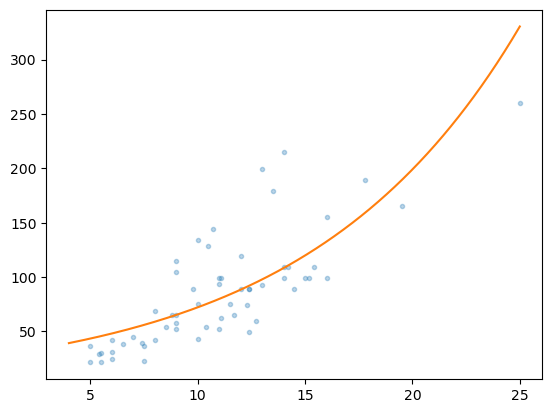

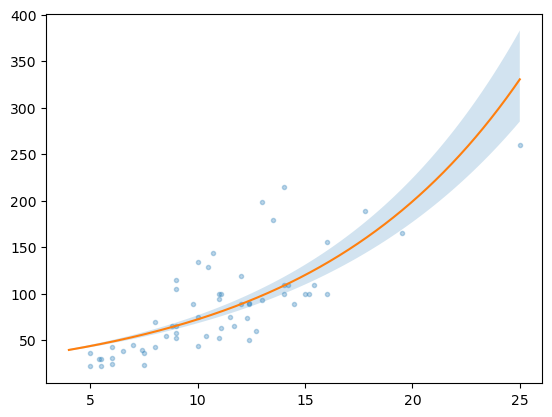

In [43]:
#Poisson
from scipy.optimize import minimize 
from numpy.linalg import inv

def neg_log_likelihood_poisson(beta, X,Y): 
    mu = np.exp(np.dot(X,beta))
    return -np.sum(Y * np.log(mu) - mu)

initial_beta = [0,0]
X_int = np.column_stack([np.ones_like(data["Diam"]), data["Diam"]])
Y_poisson = data["Price"]
res_poisson = minimize(neg_log_likelihood_poisson,initial_beta, args= (X_int, Y_poisson))
beta_0, beta_1 = res_poisson.x

fig, ax = plt.subplots()
x = data["Diam"]
ax.plot(x,data["Price"],".", alpha=0.3)
X_estimacion = np.linspace(4,25,1000)
mu_estaimacion= np.exp(beta_0 + beta_1 * X_estimacion)
ax.plot(X_estimacion, mu_estaimacion)

#matriz de diseño
mu = np.exp(X_int @ res_poisson.x)
W = np.diag(mu)

Fisher_info_matrix = X_int.T @ W @ X_int
cov_matrix = inv(Fisher_info_matrix)

sem = np.sqrt(cov_matrix[1][1])

fig, ax = plt.subplots()
x = data["Diam"]
ax.plot(x,data["Price"],".", alpha=0.3)
X_estimacion = np.linspace(4,25,1000)
mu_estaimacion= np.exp(beta_0 + beta_1 * X_estimacion)
mu_alto = np.exp(beta_0 + (beta_1 + sem *1.96) * X_estimacion)
mu_bajo = np.exp(beta_0 + (beta_1 - sem *1.96) * X_estimacion)
ax.plot(X_estimacion, mu_estaimacion)
ax.fill_between(X_estimacion, mu_bajo, mu_alto, alpha=0.2)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_18504\3047670295.py:6: RuntimeWarning: divide by zero encountered in divide
  mu = np.sqrt(-2/np.dot(X, beta))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18504\3047670295.py:6: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(-2/np.dot(X, beta))


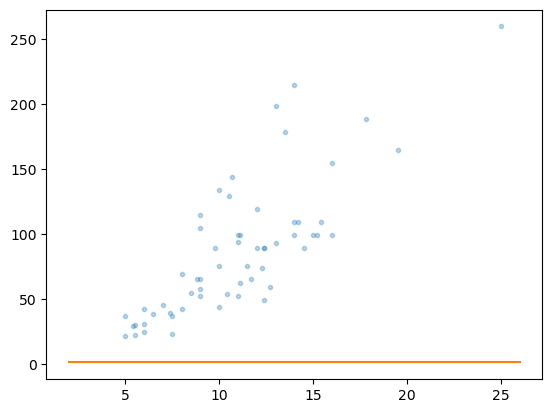

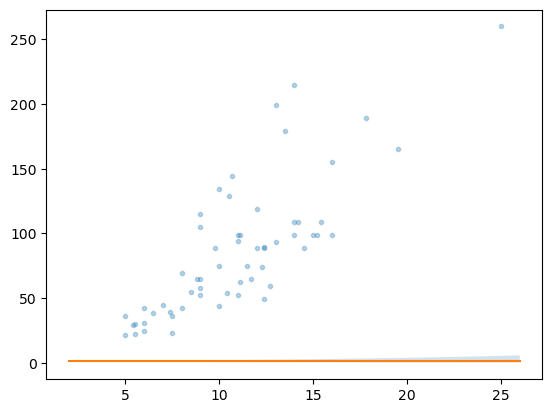

In [55]:
#gaussiana inversa
from scipy.optimize import minimize 
from numpy.linalg import inv

def neg_log_likelihood_inv_gaussian(beta, X, Y):
    mu = np.sqrt(-2/np.dot(X, beta))
    return -np.sum((Y - mu) ** 2 / (-2 * mu ** 2))

initial_beta = [0,0]
X_int = np.column_stack([np.ones_like(data["Diam"]), data["Diam"]])
Y_inv_gaussian = data["Price"]
res_inv_gaussian = minimize(neg_log_likelihood_inv_gaussian,initial_beta, args= (X_int, Y_inv_gaussian))
beta_0, beta_1 = res_inv_gaussian.x

fig, ax = plt.subplots()
x = data["Diam"]
ax.plot(x,data["Price"],".", alpha=0.3)
X_estimacion = np.linspace(2,26,1000)
mu_estaimacion= np.exp(beta_0 + beta_1 * X_estimacion)
ax.plot(X_estimacion, mu_estaimacion)

mu = np.exp(X_int @ res_inv_gaussian.x)
W = np.diag(mu)

Fisher_info_matrix = X_int.T @ W @ X_int
cov_matrix = inv(Fisher_info_matrix)
sem = np.sqrt(cov_matrix[1][1])

fig, ax = plt.subplots()
x = data["Diam"]
ax.plot(x,data["Price"],".", alpha=0.3)
X_estimacion = np.linspace(2,26,1000)
mu_estaimacion= np.exp(beta_0 + beta_1 * X_estimacion)
mu_alto = np.exp(beta_0 + (beta_1 + sem *1.96) * X_estimacion)
mu_bajo = np.exp(beta_0 + (beta_1 - sem *1.96) * X_estimacion)
ax.plot(X_estimacion, mu_estaimacion)
ax.fill_between(X_estimacion, mu_bajo, mu_alto, alpha=0.2)


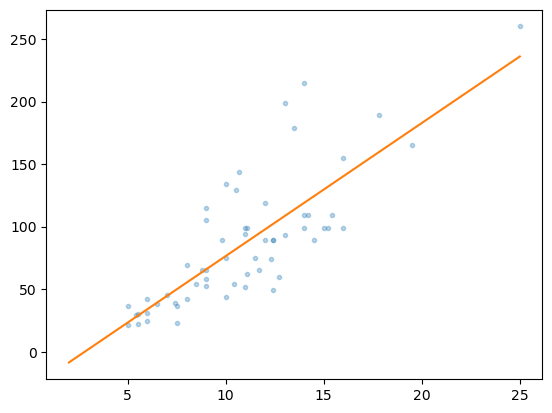

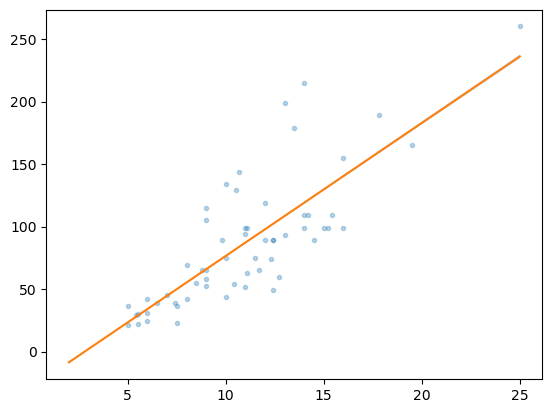

In [54]:
#Normal

def neg_log_likelihood_normal(beta, X, Y): 
    mu = np.dot(X, beta)
    sigma = 1.0 
    return np.sum((Y - mu)**2 / (2 * sigma**2))

initial_beta = [0, 0]
X_int = np.column_stack([np.ones_like(data["Diam"]), data["Diam"]])
Y_normal = data["Price"]
res_normal = minimize(neg_log_likelihood_normal, initial_beta, args=(X_int, Y_normal))
beta_0, beta_1 = res_normal.x

fig, ax = plt.subplots()
x = data["Diam"]
ax.plot(x, data["Price"], ".", alpha=0.3)
X_estimacion = np.linspace(2, 25, 1000)
mu_estimacion = beta_0 + beta_1 * X_estimacion
ax.plot(X_estimacion, mu_estimacion)

mu = X_int @ res_normal.x
W = np.eye(len(mu))  # La matriz de pesos es la matriz identidad para la distribución normal

Fisher_info_matrix = X_int.T @ W @ X_int
cov_matrix = inv(Fisher_info_matrix)

sem = np.sqrt(cov_matrix[1][1])

fig, ax = plt.subplots()
x = data["Diam"]
ax.plot(x, data["Price"], ".", alpha=0.3)
X_estimacion = np.linspace(2, 25, 1000)
mu_estimacion = beta_0 + beta_1 * X_estimacion
mu_alto = beta_0 + (beta_1 + sem * 1.96) * X_estimacion 
mu_bajo = beta_0 + (beta_1 - sem * 1.96) * X_estimacion 
ax.plot(X_estimacion, mu_estimacion)
ax.fill_between(X_estimacion, mu_bajo, mu_alto, alpha=0.2)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18504\713852106.py:6: RuntimeWarning: divide by zero encountered in log
  return -np.sum(Y * np.log(p) + (1 - Y) * np.log(1 - p))
c:\Users\Usuario\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18504\713852106.py:5: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-(np.dot(X, beta)))) # Logistic function
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18504\713852106.py:6: RuntimeWarning: divide by zero encountered in log
  return -np.sum(Y * np.log(p) + (1 - Y) * np.log(1 - p))
c:\Users\Usuario\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


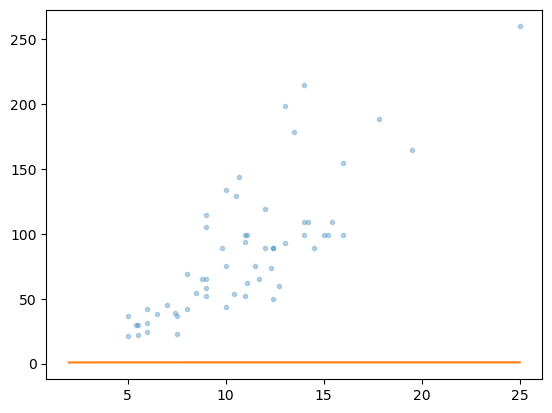

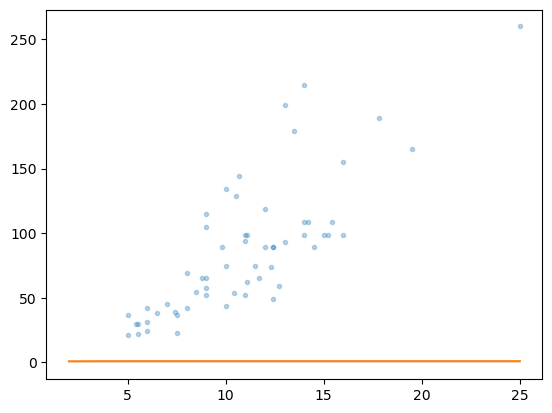

In [40]:
# binomial 

# Modified negative log-likelihood function for binomial distribution
def neg_log_likelihood_binomial(beta, X, Y):
    p = 1 / (1 + np.exp(-(np.dot(X, beta)))) # Logistic function
    return -np.sum(Y * np.log(p) + (1 - Y) * np.log(1 - p))

initial_beta = [0, 0]
X_int = np.column_stack([np.ones_like(data["Diam"]), data["Diam"]])
Y_binomial = data["Price"]

# Minimize negative log-likelihood for binomial distribution
res_binomial = minimize(neg_log_likelihood_binomial, initial_beta, args=(X_int, Y_binomial))
beta_0, beta_1 = res_binomial.x

fig, ax = plt.subplots()
x = data["Diam"]
ax.plot(x, data["Price"], ".", alpha=0.3)
X_estimation = np.linspace(2, 25, 1000)
p_estimation = 1 / (1 + np.exp(-(beta_0 + beta_1 * X_estimation)))
ax.plot(X_estimation, p_estimation)

# Compute estimated mean and confidence intervals based on binomial distribution
p = 1 / (1 + np.exp(-(X_int @ res_binomial.x)))
W = np.diag(p * (1 - p))

Fisher_info_matrix = X_int.T @ W @ X_int
cov_matrix = inv(Fisher_info_matrix)

sem = np.sqrt(cov_matrix[1][1])

fig, ax = plt.subplots()
x = data["Diam"]
ax.plot(x, data["Price"], ".", alpha=0.3)
X_estimation = np.linspace(2, 25, 1000)
p_estimation = 1 / (1 + np.exp(-(beta_0 + beta_1 * X_estimation)))
p_high = 1 / (1 + np.exp(-(beta_0 + (beta_1 + sem * 1.96) * X_estimation)))
p_low = 1 / (1 + np.exp(-(beta_0 + (beta_1 - sem * 1.96) * X_estimation)))
ax.plot(X_estimation, p_estimation)
ax.fill_between(X_estimation, p_low, p_high, alpha=0.2)
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_18504\3124343292.py:4: RuntimeWarning: invalid value encountered in log
  return -np.sum(Y * np.log(p) - mu ** power / (power - 1))


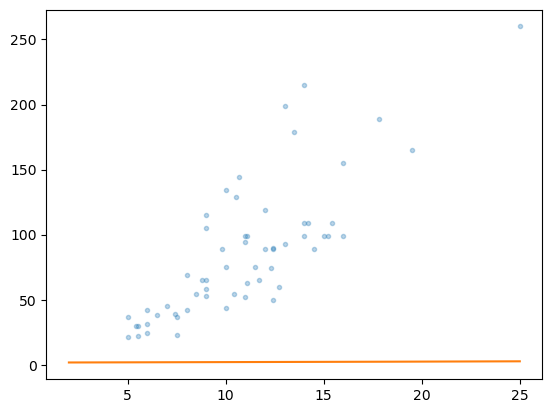

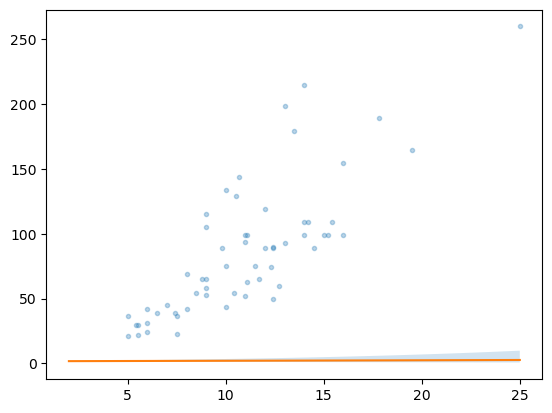

In [42]:
def neg_log_likelihood_tweedie(beta, X, Y, power):
    mu = np.exp(np.dot(X, beta))
    p = 1 - np.exp(-mu ** power) / (mu ** power)
    return -np.sum(Y * np.log(p) - mu ** power / (power - 1))


initial_beta = [0, 0]
X_int = np.column_stack([np.ones_like(data["Diam"]), data["Diam"]])
Y_tweedie = data["Price"]
power = 1.5  # Power parameter for Tweedie distribution

# Minimize negative log-likelihood for Tweedie distribution
res_tweedie = minimize(neg_log_likelihood_tweedie, initial_beta, args=(X_int, Y_tweedie, power))
beta_0, beta_1 = res_tweedie.x

fig, ax = plt.subplots()
x = data["Diam"]
ax.plot(x, data["Price"], ".", alpha=0.3)
X_estimation = np.linspace(2, 25, 1000)
mu_estimation = np.exp(beta_0 + beta_1 * X_estimation)
ax.plot(X_estimation, mu_estimation)

# Compute estimated mean and confidence intervals based on Tweedie distribution
mu = np.exp(X_int @ res_tweedie.x)
p = 1 - np.exp(-mu ** power) / (mu ** power)
W = np.diag(mu ** power * (power - 1))

Fisher_info_matrix = X_int.T @ W @ X_int
cov_matrix = inv(Fisher_info_matrix)

sem = np.sqrt(cov_matrix[1][1])

fig, ax = plt.subplots()
x = data["Diam"]
ax.plot(x, data["Price"], ".", alpha=0.3)
X_estimation = np.linspace(2, 25, 1000)
mu_estimation = np.exp(beta_0 + beta_1 * X_estimation)
mu_high = np.exp(beta_0 + (beta_1 + sem * 1.96) * X_estimation)
mu_low = np.exp(beta_0 + (beta_1 - sem * 1.96) * X_estimation)
ax.plot(X_estimation, mu_estimation)
ax.fill_between(X_estimation, mu_low, mu_high, alpha=0.2)
plt.show()

In [41]:
#binomial negativa

# Modified negative log-likelihood function for negative binomial distribution
def neg_log_likelihood_neg_binomial(beta, X, Y):
    mu = np.exp(np.dot(X, beta))
    alpha = np.exp(beta[-1]) # Shape parameter
    p = alpha / (mu + alpha) # Probability of success
    return -np.sum(Y * np.log(p) + (alpha * np.log(alpha / (mu + alpha))) + np.log(1 + (mu / alpha)))


initial_beta = [0, 0, 0] # Initial guess for beta, including shape parameter for negative binomial
X_int = np.column_stack([np.ones_like(data["Diam"]), data["Diam"]])
Y_neg_binomial = data["Price"]

# Minimize negative log-likelihood for negative binomial distribution
res_neg_binomial = minimize(neg_log_likelihood_neg_binomial, initial_beta, args=(X_int, Y_neg_binomial))
beta_0, beta_1, alpha = res_neg_binomial.x

fig, ax = plt.subplots()
x = data["Diam"]
ax.plot(x, data["Price"], ".", alpha=0.3)
X_estimation = np.linspace(2, 25, 1000)
mu_estimation = np.exp(beta_0 + beta_1 * X_estimation)
ax.plot(X_estimation, mu_estimation)

# Compute estimated mean and confidence intervals based on negative binomial distribution
mu = np.exp(X_int @ res_neg_binomial.x[:-1])
alpha = np.exp(res_neg_binomial.x[-1])
W = np.diag(mu + alpha)

Fisher_info_matrix = X_int.T @ W @ X_int
cov_matrix = inv(Fisher_info_matrix)

sem = np.sqrt(cov_matrix[1][1])

fig, ax = plt.subplots()
x = data["Diam"]
ax.plot(x, data["Price"], ".", alpha=0.3)
X_estimation = np.linspace(2, 25, 1000)
mu_estimation = np.exp(beta_0 + beta_1 * X_estimation)
mu_high = np.exp(beta_0 + (beta_1 + sem * 1.96) * X_estimation)
mu_low = np.exp(beta_0 + (beta_1 - sem * 1.96) * X_estimation)
ax.plot(X_estimation, mu_estimation)
ax.fill_between(X_estimation, mu_low, mu_high, alpha=0.2)
plt.show()


ValueError: shapes (59,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)